# Udemy

In [455]:
import os
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [456]:
folders = f"{os.getcwd()}".split('/')[:-1]
folders.extend(['udemy'])
path = os.path.join(*folders)
path = '/'+path
print(path)

/Users/school/Desktop/Github Repositories/CSE-5099/udemy


## Section 1

(1) Linear Regression Example (Age of Universe)

In [457]:
uni_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'hubble.csv')
)

display(HTML(uni_df.to_html()))

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22
6,NGC2541,714,11.22
7,NGC2090,882,11.75
8,NGC3031,80,3.63
9,NGC3198,772,13.80


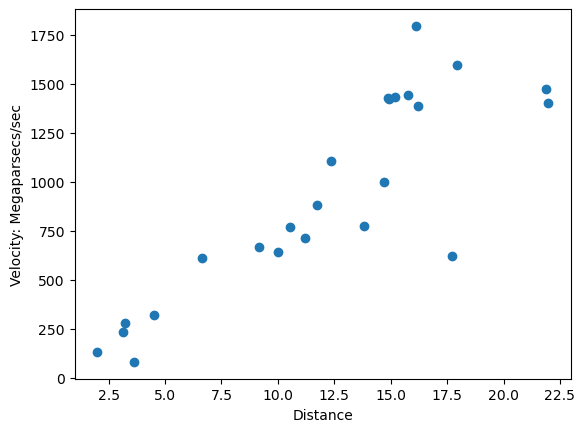

In [458]:
plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

In [459]:
model = smf.ols(
    formula='y~x-1',
    #! -1 means no intercept
    data= uni_df[['x', 'y']]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              373.1
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                    1.03e-15
Time:                        16:27:07   Log-Likelihood:                         -166.90
No. Observations:                  24   AIC:                                      335.8
Df Residuals:                      23   BIC:                                      337.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [460]:
beta = model.params.iloc[0]
print(beta)

76.58117202916935


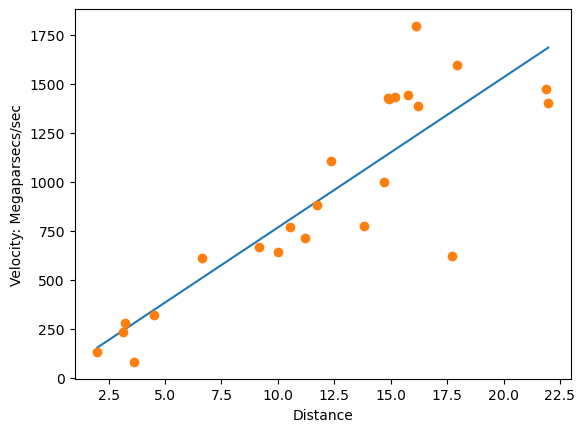

In [461]:
a = np.linspace(uni_df['x'].min(), uni_df['x'].max(), 100)
b = a * beta
plt.plot(a, b)

plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

- Fitted values: measures of Y (mean value of Y)
    - Assumptions ^: Independent residuals and with constant variance
    - DON'T want to see a trend-line go up or down
    - OR DON'T want to see it spread out as values of Y increase or decrease


Here as the mean value of Y increase, its variances also increases

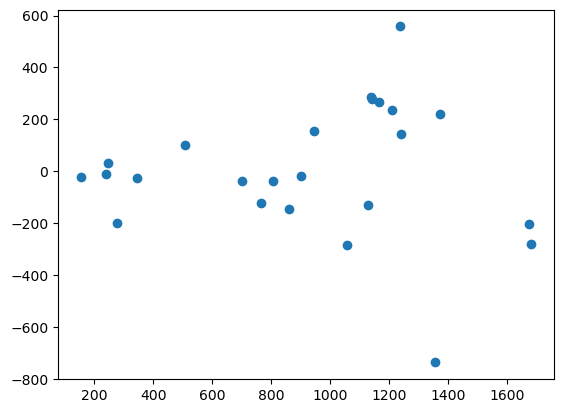

In [462]:
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)

plt.show()

Udemy says to that the most upper and lower points (row 3 & 15) could be outliers and lets fit another model with it not included.

In [463]:
uni_df = uni_df.drop(index=[2,14], axis=1)
display(HTML(uni_df.to_html()))

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22
6,NGC2541,714,11.22
7,NGC2090,882,11.75
8,NGC3031,80,3.63
9,NGC3198,772,13.80
10,NGC3351,642,10.00


In [464]:
model2 = smf.ols(
    formula='y~x-1',
    #! -1 means no intercept
    data= uni_df[['x', 'y']]).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              683.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                    1.66e-17
Time:                        16:27:07   Log-Likelihood:                         -145.01
No. Observations:                  22   AIC:                                      292.0
Df Residuals:                      21   BIC:                                      293.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

76.58117202916935


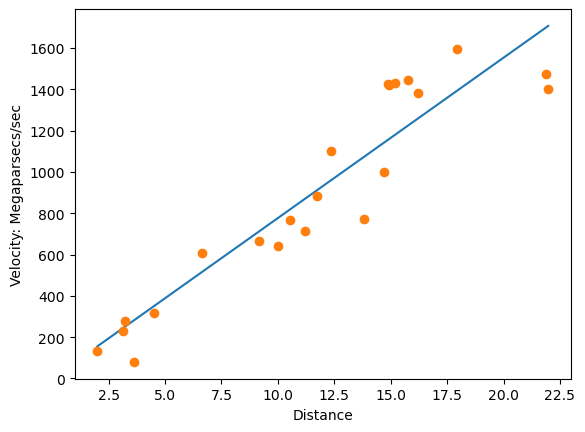

In [465]:
beta2 = model2.params.iloc[0]
print(beta)

a = np.linspace(uni_df['x'].min(), uni_df['x'].max(), 100)
b = a * beta2
plt.plot(a, b)

plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

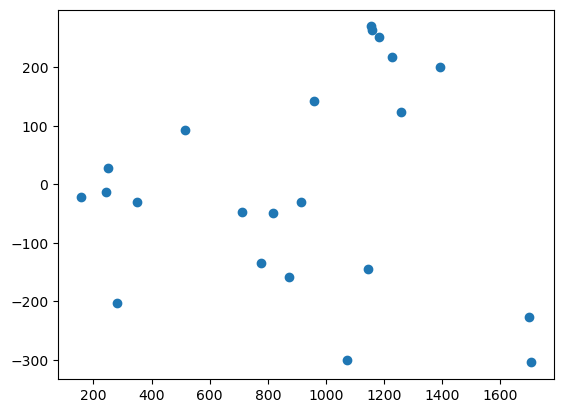

In [466]:
residuals2 = model2.resid
fitted2 = model2.fittedvalues
plt.scatter(fitted2, residuals2)
plt.show()

In [467]:
hubble_const = (beta/3.09e19, beta2/3.09e19)
print(hubble_const)

age = (1/hubble_const[0], 1/hubble_const[1])
age = (age[0]/(60^2*24*365), age[1]/(60^2*24*365))
print(age)

(np.float64(2.478355081850141e-18), np.float64(2.5136866492097877e-18))
(np.float64(23077867360554.043), np.float64(22753492313480.164))


In [468]:
HUBBLE = 4.35*(10^17)
print(age[0]/HUBBLE, age[1]/HUBBLE)

196490994981.30307 193729181042.82816


- How to tell if this is a good estimate?
    - What is the CI

Assumptions of $\hat\beta$
- that error terms $\epsilon = N(0, \sigma^2)$ for all i, which impiles that $Y_{i} = N(x_{i}*\beta, \sigma^2)$

## Section 2
### GLM

**Notes:**


Linear Models
- Assume constant variance at different values of Y
- Assume normally distributed error terms

GLM
- Allow for *specification* of the error distribution
    - Poisson, Binomial, Gamma, Exponential

<img src="error structures.png" width="600" height="500">

Linear predictor $\eta$ is the linear sum of the effects of $\eta_{i} = \sum_{j=1}^{p} x_{ij}*\beta_{j}$

- (1) Predicted Value: $\eta_{i} = \sum_{j=1}^{p} x_{ij}*\beta_{j}$
- (2) Transformed Value
    - (A) $y_{i} = g(\eta_{i})$

Goal: Calculate ODDS of heart attacks based on level of Creatinine supplements.
- Probability: yes/no
- Odds: yes/ (yes + no)

-  Binomial
    - $P(x) = \frac{n!}{(n-x)! x!} * p^{x}*q^{n-x}$
    - p: # of ppl with heart attack / total # of people

<img src="odds.png" width="600" height="500">

In [469]:
heart_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'heart.csv')
)

display(HTML(heart_df.to_html()))

# ck: amount of supplement
# ha: num of patients with heart attack
# ok: num of patients with NO hear attack

,ck,ha,ok
0,20,2,88
1,60,13,26
2,100,30,8
3,140,30,5
4,180,21,0
5,220,19,1
6,260,18,1
7,300,13,1
8,340,19,1
9,380,15,0


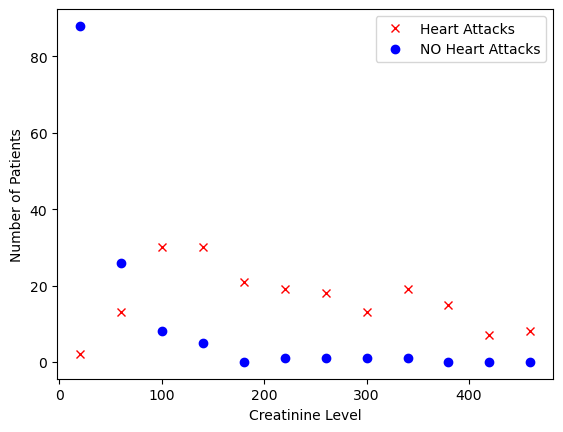

In [470]:
plt.plot(
    heart_df['ck'],
    heart_df['ha'],
    'x',
    label='Heart Attacks',
    color= 'red'
)
plt.plot(
    heart_df['ck'],
    heart_df['ok'],
    'o',
    label='NO Heart Attacks',
    color= 'blue',
)

plt.xlabel(
    xlabel= "Creatinine Level"
)
plt.ylabel(
    ylabel= "Number of Patients"
)

plt.legend()
plt.show()

In [471]:
# calculating p
# p = # of ppl with heart attack / total # of people

heart_df['p'] = heart_df['ha'] / (heart_df['ha'] + heart_df['ok'])
display(HTML(heart_df.to_html()))

,ck,ha,ok,p
0,20,2,88,0.022222
1,60,13,26,0.333333
2,100,30,8,0.789474
3,140,30,5,0.857143
4,180,21,0,1.000000
5,220,19,1,0.950000
6,260,18,1,0.947368
7,300,13,1,0.928571
8,340,19,1,0.950000
9,380,15,0,1.000000


Text(0, 0.5, 'PROPORTION of Heart attack')

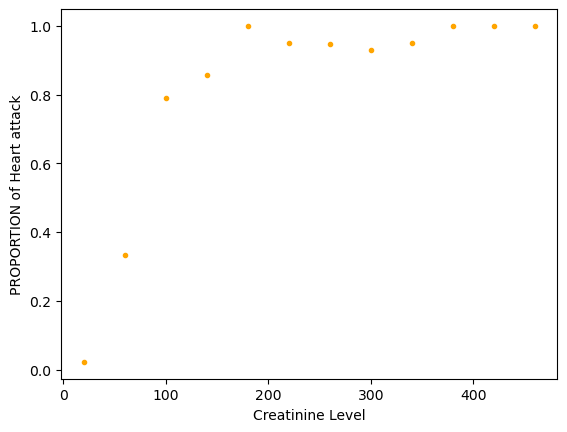

In [472]:
plt.plot(
    heart_df['ck'],
    heart_df['p'],
    '.',
    label='NO Heart Attacks',
    color= 'orange',
)

plt.xlabel(
    xlabel= "Creatinine Level"
)
plt.ylabel(
    ylabel= "PROPORTION of Heart attack"
)

We want the EXPECTED VALUE (mean level) of p

<img src="proportions.png" width="600" height="500">
<img src="proportions2.png" width="600" height="500">

In [473]:
# https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM
# https://www.statsmodels.org/stable/glm.html#families

X = heart_df['ck']
X = sm.add_constant(X)

y = heart_df[['ha', 'ok']]


model3 = sm.GLM(
    # 1D array of response (or 2D if binomial [success, failure])
    endog= y,
    
    # NxK array of input data
    exog= X,
    
    #
    family= sm.families.Binomial(),
    
    # offset=None,
    # exposure=None,
    # freq_weights=None,
    # var_weights=None,
    # missing='none',
    # **kwargs
).fit()

print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['ha', 'ok']   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.167
Date:                Fri, 04 Apr 2025   Deviance:                       36.929
Time:                        16:27:07   Pearson chi2:                     205.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7584      0.337     -8.192      0.0

In [474]:
print(model3.deviance) # want it to be small and at least equal to degrees of freedom
print(model3.df_resid)

36.92862296812407
10


In [475]:
B0 = model3.params.iloc[0]
B1= model3.params.iloc[1]

print(f"B0= {B0} | B1= {B1}")

B0= -2.758358203281892 | B1= 0.031243732087198255


In [476]:
X = heart_df['ck']
X = sm.add_constant(X)
y_pred = model3.predict(X)

print(y_pred)

0     0.105885
1     0.292405
2     0.590496
3     0.834210
4     0.946115
5     0.983940
6     0.995344
7     0.998661
8     0.999616
9     0.999890
10    0.999968
11    0.999991
dtype: float64


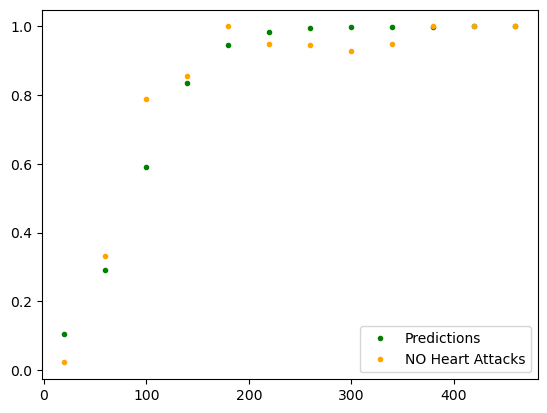

In [477]:
plt.plot(
    heart_df['ck'],
    y_pred,
    '.',
    label='Predictions',
    color= 'green',
)

plt.plot(
    heart_df['ck'],
    heart_df['p'],
    '.',
    label='NO Heart Attacks',
    color= 'orange',
)
plt.legend()
plt.show()

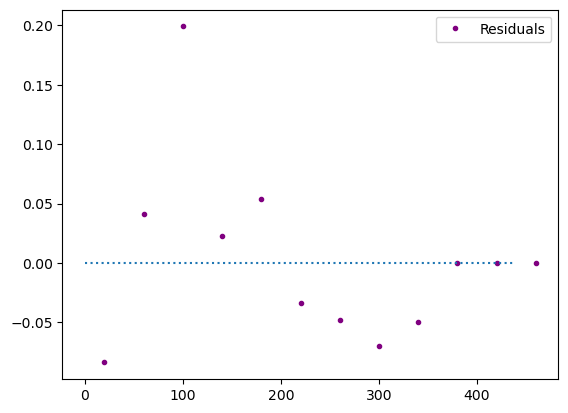

In [478]:
res = heart_df['p'] - y_pred

plt.plot(
    heart_df['ck'],
    res,
    '.',
    label='Residuals',
    color='purple'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

plt.legend()
plt.show()

In [479]:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

coefficients = np.polyfit(
    x= heart_df['ck'], 
    y= res,
    deg= 3
)
poly_func = np.poly1d(coefficients)

x_fit = np.linspace(heart_df['ck'].min(), heart_df['ck'].max(), 100)
y_fit = poly_func(x_fit)

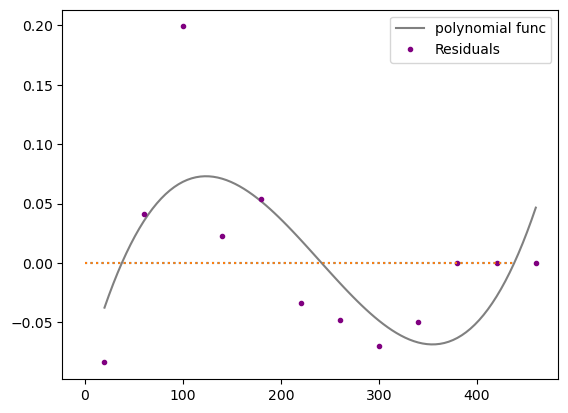

In [480]:
plt.plot(
    x_fit,
    y_fit,
    label='polynomial func',
    color='grey'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

plt.plot(
    heart_df['ck'],
    res,
    '.',
    label='Residuals',
    color='purple'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

plt.legend()
plt.show()

tutorial guy says he wants to plot ck^2 & ck&3 as well

In [481]:
X = np.stack(
    (heart_df['ck'], np.pow(heart_df['ck'], 2), np.pow(heart_df['ck'], 3)) ,
    axis= 1
)
X = sm.add_constant(X)
print(X)

y = heart_df[['ha', 'ok']]


model4 = sm.GLM(
    # 1D array of response (or 2D if binomial [success, failure])
    endog= y,
    
    # NxK array of input data
    exog= X,
    
    #
    family= sm.families.Binomial(),
    
    # offset=None,
    # exposure=None,
    # freq_weights=None,
    # var_weights=None,
    # missing='none',
    # **kwargs
).fit()

print(model4.summary())

[[1.0000e+00 2.0000e+01 4.0000e+02 8.0000e+03]
 [1.0000e+00 6.0000e+01 3.6000e+03 2.1600e+05]
 [1.0000e+00 1.0000e+02 1.0000e+04 1.0000e+06]
 [1.0000e+00 1.4000e+02 1.9600e+04 2.7440e+06]
 [1.0000e+00 1.8000e+02 3.2400e+04 5.8320e+06]
 [1.0000e+00 2.2000e+02 4.8400e+04 1.0648e+07]
 [1.0000e+00 2.6000e+02 6.7600e+04 1.7576e+07]
 [1.0000e+00 3.0000e+02 9.0000e+04 2.7000e+07]
 [1.0000e+00 3.4000e+02 1.1560e+05 3.9304e+07]
 [1.0000e+00 3.8000e+02 1.4440e+05 5.4872e+07]
 [1.0000e+00 4.2000e+02 1.7640e+05 7.4088e+07]
 [1.0000e+00 4.6000e+02 2.1160e+05 9.7336e+07]]
                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['ha', 'ok']   No. Observations:                   12
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   

In [482]:
print(model4.deviance) # want it to be small and at least equal to degrees of freedom
print(model4.df_resid)

4.252454150750626
8


In [483]:
X = np.stack(
    (heart_df['ck'], np.pow(heart_df['ck'], 2), np.pow(heart_df['ck'], 3)) ,
    axis= 1
)
X = sm.add_constant(X)
y_pred = model4.predict(X)

print(y_pred)

[0.02270378 0.33029355 0.77424018 0.90913735 0.94007997 0.94424574
 0.94159557 0.94546376 0.96425385 0.98730902 0.99812627 0.99990986]


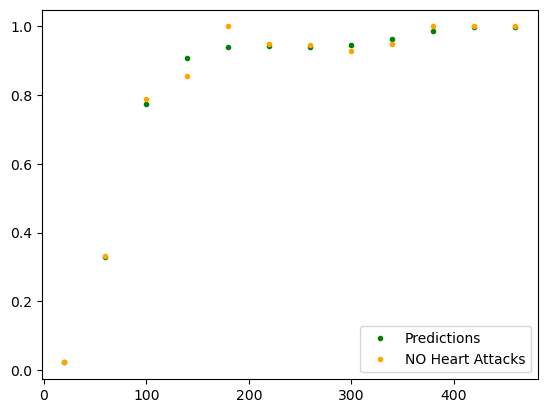

In [484]:
plt.plot(
    heart_df['ck'],
    y_pred,
    '.',
    label='Predictions',
    color= 'green',
)

plt.plot(
    heart_df['ck'],
    heart_df['p'],
    '.',
    label='NO Heart Attacks',
    color= 'orange',
)
plt.legend()
plt.show()

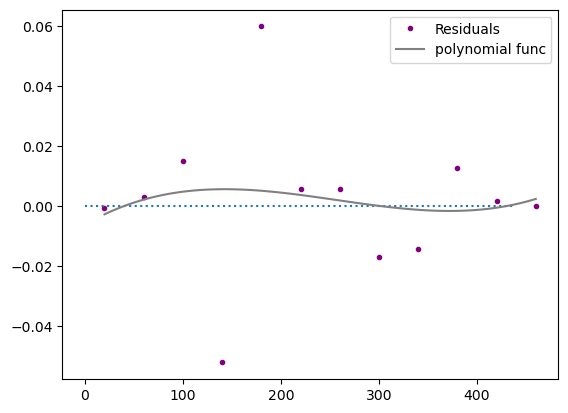

In [485]:
res = heart_df['p'] - y_pred

plt.plot(
    heart_df['ck'],
    res,
    '.',
    label='Residuals',
    color='purple'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

coefficients = np.polyfit(
    x= heart_df['ck'], 
    y= res,
    deg= 3
)
poly_func = np.poly1d(coefficients)

x_fit = np.linspace(heart_df['ck'].min(), heart_df['ck'].max(), 100)
y_fit = poly_func(x_fit)

plt.plot(
    x_fit,
    y_fit,
    label='polynomial func',
    color='grey'
)

plt.legend()
plt.show()

## Section 2: EXERCISE

- The  first  column  contains  the  counts  of  simple  aberrant  foci  (ACFs)
- [A] Create scatterplot of count ~ endtime.
- [B] Run 2 GLMs
    - [1] specifies count (response) as predicted by endtime (explanatory) & uses a poisson family for distribution.  Plot.
    - [2] 2nd model add endtime^2. Compare 2 models


In [486]:
rat_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'ACF1.csv')
)
display(HTML(rat_df.to_html()))

,count,endtime
0,1,6
1,3,6
2,5,6
3,1,6
4,2,6
5,1,6
6,1,6
7,3,12
8,1,12
9,2,12


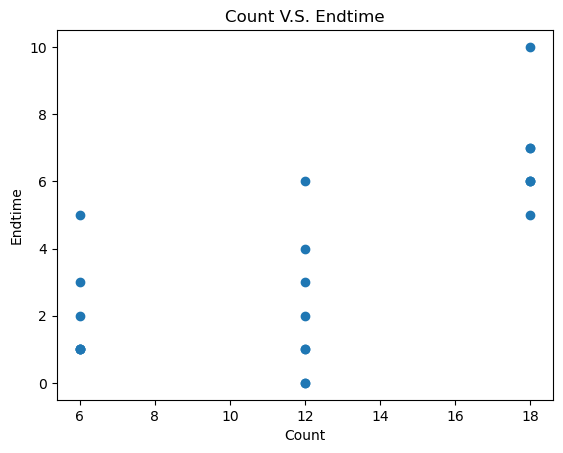

In [487]:
plt.plot(
    rat_df['endtime'],
    rat_df['count'],
    'o'
)
plt.title(
    label= 'Count V.S. Endtime'
)
plt.xlabel(
    xlabel= 'Count'
)
plt.ylabel(
    ylabel= 'Endtime'
)
plt.show()

In [488]:
# GLM 1

X = rat_df['count']
X = sm.add_constant(X)
X = X.to_numpy()

y = rat_df['endtime']
y = y.to_numpy()

ex_m1 = sm.GLM(
    endog= y,
    exog= X,
    family= sm.families.Poisson()
    # offset: Any | None = None,
    # exposure: Any | None = None,
    # freq_weights: Any | None = None,
    # var_weights: Any | None = None,
    # missing: str = 'none',
    # **kwargs: Any
).fit()

print(ex_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   22
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.084
Date:                Fri, 04 Apr 2025   Deviance:                       24.711
Time:                        16:27:08   Pearson chi2:                     23.3
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5830
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1104      0.111     18.999      0.0

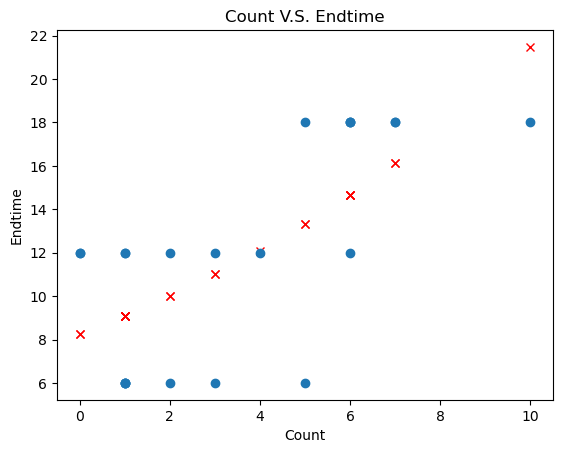

In [489]:
y_pred = ex_m1.predict(X)

plt.plot(
    rat_df['count'],
    y_pred,
    'x',
    color= 'red'
)
plt.plot(
    rat_df['count'],
    rat_df['endtime'],
    'o'
)
plt.title(
    label= 'Count V.S. Endtime'
)
plt.xlabel(
    xlabel= 'Count'
)
plt.ylabel(
    ylabel= 'Endtime'
)
plt.show()

In [490]:
# GLM 1

X2 = np.stack(
    (rat_df['count'], np.pow(rat_df['count'], 2)),
    axis= 1
)
X2 = sm.add_constant(X)

y = rat_df['count']
y = y.to_numpy()

ex_m2 = sm.GLM(
    endog= y,
    exog= X2,
    family= sm.families.Poisson()
    # offset: Any | None = None,
    # exposure: Any | None = None,
    # freq_weights: Any | None = None,
    # var_weights: Any | None = None,
    # missing: str = 'none',
    # **kwargs: Any
).fit()

print(ex_m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   22
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.109
Date:                Fri, 04 Apr 2025   Deviance:                       8.3777
Time:                        16:27:08   Pearson chi2:                     6.08
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8566
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0897      0.249      0.360      0.7

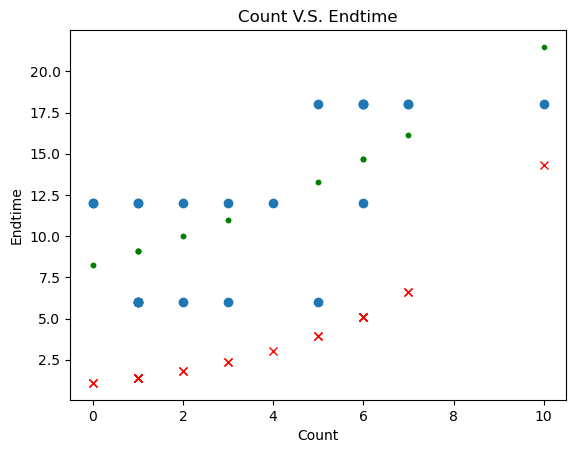

In [491]:
y_pred_2 = ex_m2.predict(X2)
plt.plot(
    rat_df['count'],
    y_pred_2,
    'x',
    color= 'red'
)
y_pred_1 = ex_m1.predict(X)
plt.plot(
    rat_df['count'],
    y_pred_1,
    '.',
    color= 'green'
)


plt.plot(
    rat_df['count'],
    rat_df['endtime'],
    'o'
)
plt.title(
    label= 'Count V.S. Endtime'
)
plt.xlabel(
    xlabel= 'Count'
)
plt.ylabel(
    ylabel= 'Endtime'
)
plt.show()

In [492]:
print(ex_m1.deviance)
print(ex_m1.df_resid)
print(ex_m2.deviance)
print(ex_m2.df_resid)

24.71135725165682
20
8.377659419347953
20


## Section 3: GLM Part 2

- Reviewing "Day 1 Exercises with Solutions"... So I'm gonna do it before the review

### Day 1: Q1
The  R  data  frame  warpbreaks gives  the  number  of  breaks  per fixed  length  of  wool during weaving, for two different wool  types, and 3 different weaving 
tensions. Using a linear model, establish whether there is evidence that the effect  of  tension  on  break  rate  is  dependent on  the  type  of  wool.  If  there is,  use interaction.plot() function to examine the nature of the dependence.

In [493]:
warp_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'warpbreaks.csv')
)
display(HTML(warp_df[:10].to_html()))

,breaks,wool,tension
0,26,A,L
1,30,A,L
2,54,A,L
3,25,A,L
4,70,A,L
5,52,A,L
6,51,A,L
7,26,A,L
8,67,A,L
9,18,A,M


In [494]:
print(warp_df['breaks'].describe(), '\n')
print(warp_df[['wool','tension']].describe())

count    54.000000
mean     28.148148
std      13.198638
min      10.000000
25%      18.250000
50%      26.000000
75%      34.000000
max      70.000000
Name: breaks, dtype: float64 

       wool tension
count    54      54
unique    2       3
top       A       L
freq     27      18


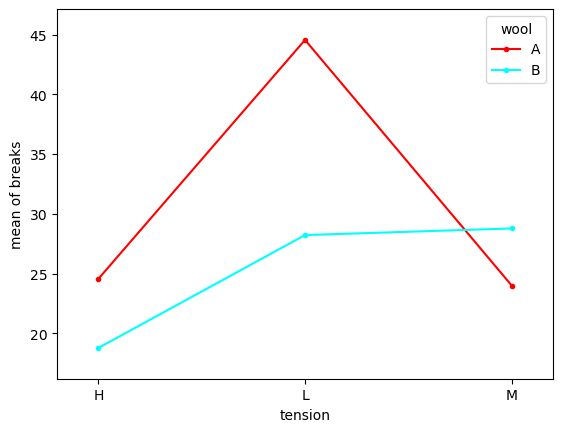

In [495]:
""" 
... evidence that the effect 
of  tension  on  break  rate 
is  dependent on  the  type  of  wool.
"""

fig = sm.graphics.interaction_plot(
    x= warp_df['tension'],
    trace= warp_df['wool'],
    response= warp_df['breaks']
)
plt.show()

In [496]:
warp_df = sm.add_constant(warp_df)
print(warp_df[:10])

   const  breaks wool tension
0    1.0      26    A       L
1    1.0      30    A       L
2    1.0      54    A       L
3    1.0      25    A       L
4    1.0      70    A       L
5    1.0      52    A       L
6    1.0      51    A       L
7    1.0      26    A       L
8    1.0      67    A       L
9    1.0      18    A       M


In [497]:
# https://www.statsmodels.org/dev/generated/statsmodels.formula.api.glm.html

""" 
... evidence that the effect 
of  tension  on  break  rate 
is  dependent on  the  type  of  wool.
"""

m = sm.formula.glm(
    formula= 'breaks ~ C(wool) + C(tension) + C(wool)*C(tension)', 
    data= warp_df,
    # subset,
    # drop_cols,
    family= sm.families.Poisson() # try to match Degrees of freedom with deviance
).fit()

print(m.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 breaks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -228.48
Date:                Fri, 04 Apr 2025   Deviance:                       182.31
Time:                        16:27:08   Pearson chi2:                     181.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8813
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Wool.B, Tension.L, (Wool.B)(Tension.M) p-vals < 0.05
 - Meaning that HAVING AN impact on the model is very likely

I would say that tension dose have an effect on breaks,
as well as wool*tension having an effect on breaks as well.

I suppose that *"evidence that the effect of tension on break is dependent on type of well"* is true for Wool.B & Tension.M. As Tension.M has LITTLE effect on breaks due to its high p-value but when multiplied by Wool.B that effect is VALID to its lower p-value

WHAT GUY SAYS:
- What I said + he used Gaussian instead of Poisson.


### Day 1: Q3

The  following  table  shows  numbers  of  occasions  when  inhibition  (i.e.,  no  flow  of  current across a membrane) occurred within 120 s, for different concentrations of the  protein peptide-C. The outcome yes implies that inhibition has occurred. Use logistic  regression to model the probability of inhibition as a function of protein concentration. Report  and plot your results fully. Interpret your results.

In [498]:
'''
- Use Logistic regression
'''


inhibit_df = pd.DataFrame(
    data = {
        'conc': [.1, .5, 1, 10, 20, 30, 50, 70, 80, 100, 150], # concentration after 120 sec
        'no': [7, 1, 10, 9, 2, 9, 13, 1, 1, 4, 3],
        'yes': [0, 0, 3, 4, 0, 6, 7, 0, 0, 1, 7] # At 120 sec, did inhibition occur?
    }
)
print(inhibit_df)

     conc  no  yes
0     0.1   7    0
1     0.5   1    0
2     1.0  10    3
3    10.0   9    4
4    20.0   2    0
5    30.0   9    6
6    50.0  13    7
7    70.0   1    0
8    80.0   1    0
9   100.0   4    1
10  150.0   3    7


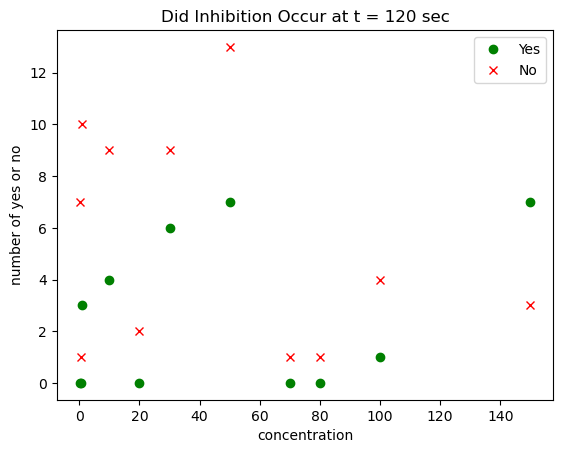

In [499]:
plt.plot(
    inhibit_df['conc'],
    inhibit_df['yes'],
    'o',
    color= 'green',
    label= 'Yes'
)
plt.plot(
    inhibit_df['conc'],
    inhibit_df['no'],
    'x',
    color= 'red',
    label= 'No'
)
plt.title(label= 'Did Inhibition Occur at t = 120 sec')
plt.xlabel(xlabel= 'concentration')
plt.ylabel(ylabel= 'number of yes or no')

plt.legend()
plt.show()

In [500]:
inhibit_df['p_yes'] = inhibit_df['yes']/(inhibit_df['yes']+inhibit_df['no'])

print(inhibit_df)

     conc  no  yes     p_yes
0     0.1   7    0  0.000000
1     0.5   1    0  0.000000
2     1.0  10    3  0.230769
3    10.0   9    4  0.307692
4    20.0   2    0  0.000000
5    30.0   9    6  0.400000
6    50.0  13    7  0.350000
7    70.0   1    0  0.000000
8    80.0   1    0  0.000000
9   100.0   4    1  0.200000
10  150.0   3    7  0.700000


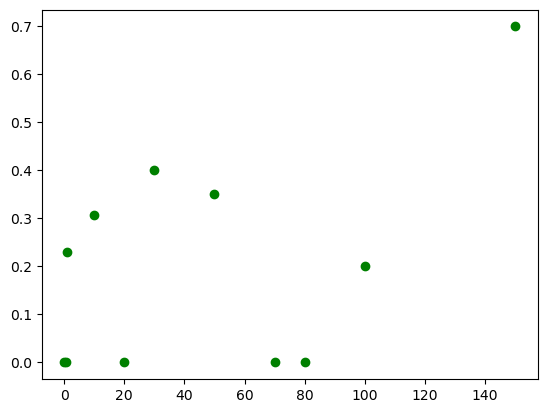

In [501]:
plt.plot(
    inhibit_df['conc'],
    inhibit_df['p_yes'],
    'o',
    color= 'green',
    label= 'Yes'
)

plt.show()

In [502]:
# X = inhibit_df['conc']

X = np.stack(
    (inhibit_df['conc'], np.pow(inhibit_df['conc'],3)),
    axis= 1
)
X = sm.add_constant(X)
print(X)
print(X.shape)


[[1.000e+00 1.000e-01 1.000e-03]
 [1.000e+00 5.000e-01 1.250e-01]
 [1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.000e+01 1.000e+03]
 [1.000e+00 2.000e+01 8.000e+03]
 [1.000e+00 3.000e+01 2.700e+04]
 [1.000e+00 5.000e+01 1.250e+05]
 [1.000e+00 7.000e+01 3.430e+05]
 [1.000e+00 8.000e+01 5.120e+05]
 [1.000e+00 1.000e+02 1.000e+06]
 [1.000e+00 1.500e+02 3.375e+06]]
(11, 3)


In [503]:
y = inhibit_df[['yes', 'no']]
print(y)

    yes  no
0     0   7
1     0   1
2     3  10
3     4   9
4     0   2
5     6   9
6     7  13
7     0   1
8     0   1
9     1   4
10    7   3


In [504]:
d1_q3 = sm.GLM(
    endog= y,
    exog= X,
    family= sm.families.Binomial()
).fit()

print(d1_q3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          ['yes', 'no']   No. Observations:                   11
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.344
Date:                Fri, 04 Apr 2025   Deviance:                       10.087
Time:                        16:27:08   Pearson chi2:                     7.17
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4510
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1940      0.409     -2.917      0.0

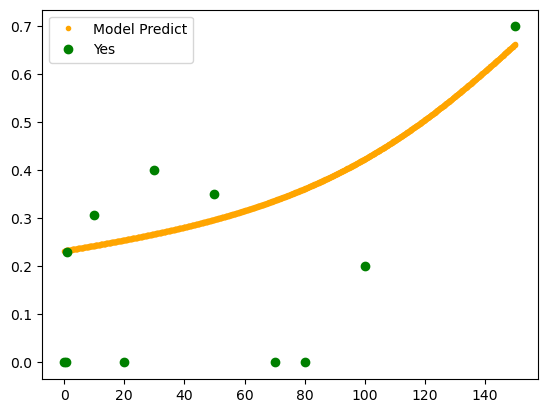

In [505]:
x_m_graph = np.linspace(
    start= inhibit_df['conc'].min(),
    stop= inhibit_df['conc'].max(),
    num= 1_000
)

x_m_graph_2 = np.stack(
    (x_m_graph, np.pow(x_m_graph, 3)),
    axis= 1
)

x_m_graph_2 = sm.add_constant(x_m_graph_2)

y_m_graph = d1_q3.predict(x_m_graph_2)


plt.plot(
    x_m_graph,
    y_m_graph,
    '.',
    color= 'orange',
    label= 'Model Predict'
)

plt.plot(
    inhibit_df['conc'],
    inhibit_df['p_yes'],
    'o',
    color= 'green',
    label= 'Yes'
)


plt.legend()
plt.show()